In [ ]:
import numpy as np
import pandas as pd

# Теория вероятностей

## 1. Базовые понятия

**Теория вероятностей** – математическая наука, позволяющая по вероятности одних случайных событий находить вероятности других случайных событий, связанных каким–либо образом между собой.  
Любой эксперимент имеет результат. В ТВ результат эксперимента – это **исход**.

Исход или группа исходов, удовлетворяющих определенным требованием, называется **событием**.

Например, если считать при броске кубика событием выпадение 1, а выпало 3, то событие не произошло.

In [ ]:
np.random.randint(1, 7)

1

**Достоверное событие** – это такое событие, которое всегда происходит в рассматриваемом эксперименте.

**Невозможное событие** – это такое событие, которое никогда не может наступить в рассматриваемом эксперименте.

Событие, которое при воспроизведении опыта может наступить, а может и не наступить, называется **случайным событием**.

In [ ]:
# Какое событие здесь будет невозможно, если моделируем бросок кубика?
np.random.randint(1, 6)

3

## Вероятностное пространство

Вероятностное пространство – $(\Omega, \Sigma, P)$

* $\Omega$ – произвольное непустое множество, элементы которого называются исходами  
* $\sigma$ - сигма-алгебра подмножеств $\Omega$ , называемых случайными событиями:
  * $\sigma$ содержит $\Omega$
  * Если $E \in \sigma$, то его дополнение $X \backslash E \in \sigma$
  * Объединение или пересечение подмножеств из $\Sigma$ принадлежит $\sigma$
* $P$ – вероятность, такая, что $P(\Omega) = 1$

**Вероятность** – степень возможности наступления события.

In [ ]:
np.random.randint(0, 2, 100000000).mean()

0.5000003

In [ ]:
number_of_rolls = 1000000
dice_rolls = np.random.randint(1, 7, number_of_rolls)
len(np.where(dice_rolls == 1)[0]) / number_of_rolls

0.167004

In [ ]:
1/6

0.16666666666666666

### Дополнение, Объединение, Пересечение

Дополнение – есть событие $A$ с вероятностью $P(A)$ и событие $B = \Omega \backslash A$, тогда $P(B) = 1 - P(A)$

Объединение – $A \cup B$. Произошло либо $A$, либо $B$, либо $A$ и $B$ одновременно

Пересечение – $A \cap B$. Произошли одновременно $A$ и $B$

## 2. Условная вероятность

$P(A|B)$ – вероятность события $A$ при условии, что $B$ произошло

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

In [ ]:
data = pd.read_csv("./data.csv")

In [ ]:
data

,company,model,rating,type
0,ford,mustang,A,coupe
1,chevy,camaro,B,coupe
2,ford,fiesta,C,sedan
3,ford,focus,A,sedan
4,ford,taurus,B,sedan
5,toyota,camry,B,sedan


In [ ]:
rating_probs = data.groupby('rating').size().div(len(data))
rating_probs

rating
A    0.333333
B    0.500000
C    0.166667
dtype: float64

Посчитаем все условные вероятности для $P(type|rating)$

In [ ]:
data.groupby(['type', 'rating']).size().div(len(data))

type   rating
coupe  A         0.166667
       B         0.166667
sedan  A         0.166667
       B         0.333333
       C         0.166667
dtype: float64

In [ ]:
data.groupby(['type', 'rating']).size().div(len(data)).div(rating_probs, axis=0, level='rating')


type   rating
coupe  A         0.500000
       B         0.333333
sedan  A         0.500000
       B         0.666667
       C         1.000000
dtype: float64

In [ ]:
data['count'] = 1
pivot = pd.pivot_table(
    data, 
    values='count', 
    index=['rating'], 
    columns=['type'], 
    aggfunc=np.size, 
    fill_value=0
)
pivot

type,coupe,sedan
rating,,
A,1,1
B,1,2
C,0,1


Посчитаем по pivot table условную вероятность для $P(coupe|A)$

In [ ]:
(1/(1 + 1 + 1 + 2 + 1))/(1/3)

0.5

In [ ]:
(pivot.loc['A', 'coupe']/(pivot.sum().sum())) / rating_probs['A']

0.5

## 3. Формула Байеса

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Выводится из формулы условной вероятности:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$
$$P(B|A) = \frac{P(B \cap A)}{P(A)}$$
$$P(A \cap B) = P(B \cap A) \implies$$
$$P(A \cap B) = P(A|B) \cdot P(B) = P(B|A) \cdot P(A) \implies$$
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Поговорим про лекарства:  
Допустим, надо оценить вероятность того, что человек принимает лекарства (U – принимает, !U – не принимает)  
Тест может вернуть положительный или отрицательный результат (+ или -)

Допустим, наш тест имеет sensitivity 97% – из 100 человек тест будет True Positive у 97  
Допустим, наш тест имеет specificity 95% – из 100 человек тест будет True Negative у 95  
Также, мы знаем, что 0.5% нашего населения использует это лекарство (наш Prior)

Какая вероятность, что случайно взятый человек будет использовать лекарство?

$$P(U|+) = \frac{P(+|U) \cdot P(U)}{P(+)} = \frac{P(+|U) \cdot P(U)}{P(+|U) \cdot P(U) + P(+|!U) \cdot p(!U)}$$

$P(U) = распространенность \space (prevalence)$  
$P(!U) = 1 - P(U)$  
$P(+|U) = sensitivity$  
$P(-|!U) = specificity$  
$P(+|!U) = 1 - specificity$

In [ ]:
def drug_user(
        sensitivity=0.97,
        specificity=0.95,
        prevalence=0.005):
    
    p_user = prevalence
    p_non_user = 1 - prevalence
    p_pos_user = sensitivity
    p_neg_user = specificity
    p_pos_non_user = 1 - specificity
    
    num = p_pos_user * p_user
    den = p_pos_user * p_user + p_pos_non_user * p_non_user
    
    prob = num/den
    
    return prob

In [ ]:
drug_user(sensitivity=0.97, specificity=0.95, prevalence=0.005)

0.08882783882783876

Получается, даже при большой чувствительности и специфичности мы находим человека, использующего лекарство, при положительном тесте всего в 9% случаев

## 4. Случайные величины

### Матожидание и дисперсия

Математическое ожидание $E(X)$ – среднее значение случайной величины.

Дисперсия $D(X)$ – разброс случайной величины. Стандартное отклонение – корень из дисперсии.

In [ ]:
data = np.random.randint(0, 10, 5000)
data

array([7, 0, 7, ..., 3, 3, 5])

In [ ]:
E = data.mean()
E
# 4.543

4.5354

In [ ]:
D = np.square(data.std())
D
# 8.194951000000001

8.125257560000001

In [ ]:
data.std()

2.8504837414025013

### Функция распределения и плотность вероятности

Функция распределения (Cumulative Distribution Function, CDF): $F(x) = P(X \leq x)$  
Значение функции распределения в точке $x$ равно вероятности события ${X \leq x}$

Функция плотности вероятности (Probability Density Function, PDF): такая $f(X)$, что 
$$P(\xi \in [a, b]) = \int_a^b f(x)dx$$

То есть, можем получить вероятность события, взяв интеграл по функции распределения.

Вероятность того, что переменная попала в промежуток $[a, b]$ = $F(b) - F(a)$

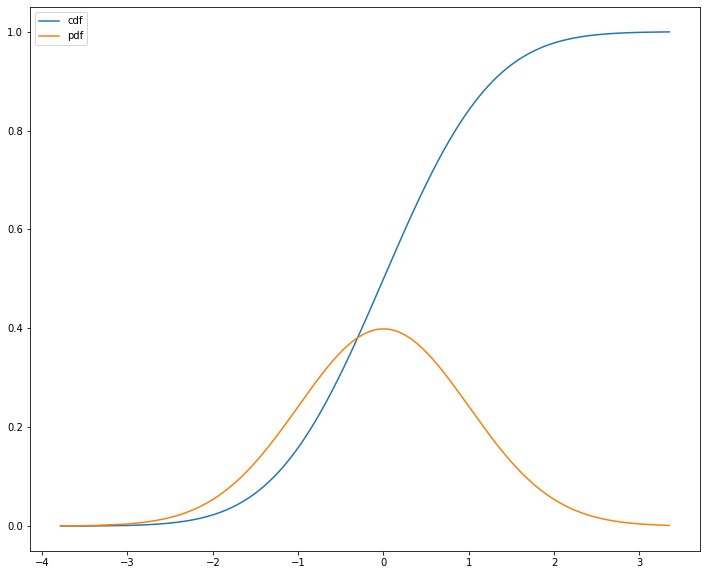

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

x = np.random.randn(10000) 
norm_cdf = scipy.stats.norm.cdf(x) 
norm_pdf = scipy.stats.norm.pdf(x) 

plt.figure(figsize=(12, 10))
sns.lineplot(x=x, y=norm_cdf, label='cdf')
sns.lineplot(x=x, y=norm_pdf, label='pdf')
plt.show();

### Распределение среднего

Если мы возьмем случайные примеры ($X_1 .. X_n$) из выборки с $E = \mu$ и $D = \sigma^2$, то распределение следующей случайной величины будет нормальным: 
$$Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt(n)}}$$
При $n \rightarrow \infty$  
Это называется Центральная Предельная Теорема

Матожидание 171.24
Стандартное отклонение 16.61


<Figure size 432x288 with 0 Axes>

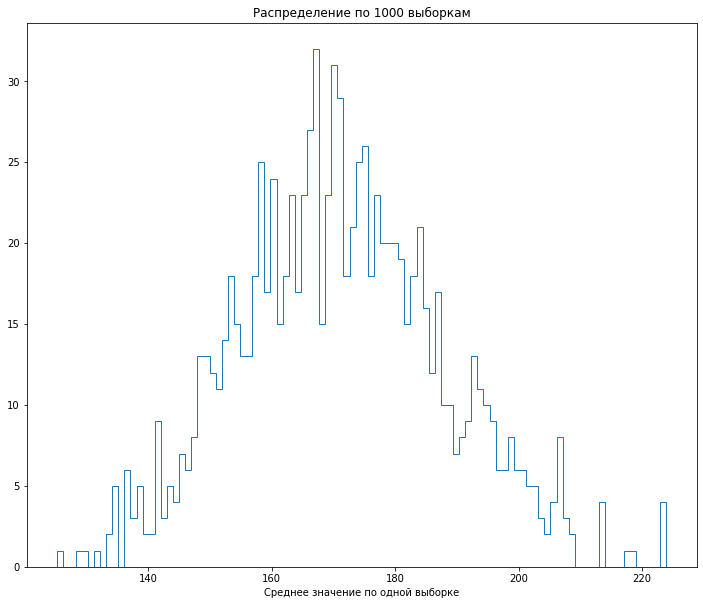

In [ ]:
def repeat_sample_draws_exponential(n, samp_size, mu):
    means = []
    samples = []
    for i in range(0, n):
        samples.append(np.random.exponential(mu, samp_size))
        means.append(np.mean(samples[i]))

    plt.clf()
    plt.figure(figsize=(12, 10))
    plt.hist(means, bins=100, histtype='step')
    plt.title('Распределение по {} выборкам'.format(n))
    plt.xlabel('Среднее значение по одной выборке')
    print('Матожидание {0:.2f}'.format(np.mean(means)))
    print('Стандартное отклонение {0:.2f}'.format(np.std(means)))

repeat_sample_draws_exponential(1000, 100, 170)

$\sigma_{sample_mean} = \frac{\sigma_{population}}{\sqrt{sample_size}}$

# Медиана и дисперсия дискретного распределения

In [ ]:
import scipy.stats
from scipy import optimize

# найдите медиану распределения
values = [[10, 20], [0.2, 0.8]]
X = scipy.stats.rv_discrete(values=values)
X.median()

20.0

In [ ]:
values = [[10, 15, 20, 30], [0.25, 0.25, 0.2, 0.3]]
X = scipy.stats.rv_discrete(values=values)
X.median()

15.0

In [ ]:
values = [[10, 15, 20, 30, 1000000], [0.25, 0.25, 0.2, 0.2, 0.1]]
X = scipy.stats.rv_discrete(values=values)
X.median()

15.0

In [ ]:
values = [[-1, 0, 1, 2], [0.5, 0.2, 0.2, 0.1]]
X = scipy.stats.rv_discrete(values=values)
X.var()

1.09

In [ ]:
X.std()

1.044030650891055

In [ ]:
def f(x):
  return -(x - x**2)

optimize.minimize(f, x0=0.1)

      fun: -0.24999999999999994
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([0.49999999])

# Дискретное равномерное распределение

$X \sim Uniform([a, b])$

Равновероятные модели (генератор случайных чисел, равномерный шум)

$EX = \frac{a + b}{2}$

$var = \frac{n^2 - 1}{12}$

$std = \frac{n-1}{\sqrt{12}}$

$std = \frac{b-a}{\sqrt{12}}$, для непрервыного

Задача 1

Найдите ожидаемое количество эклеров и стандартное отклонение при покупке в равновероятной модели.

Решение:

Пусть X — количество купленных эклеров, N = 6, P = 1/6 

In [ ]:
from sympy.stats import DiscreteUniform, density, variance, E

X = DiscreteUniform(name='X', items=list(range(1, 7)))

print(density(X).dict)
print(E(X))
print(variance(X)**(1/2))

{1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}
7/2
1.70782512765993


# Распределение Бернулли

$EX = np$, n независимых опытов

$var(X) = npq$, p - success, q - failure (= 1-p)

$std(X) = \sqrt{np(1-p)}$

Вероятность из n опытов k успехов:

$P_n(k) = C_n^k \cdot p^k \cdot q^{n-k}$

Задача 2

Вы стреляете по мишени. Вероятность попасть составляет 60%. В случае успеха вы выиграете плюшевого мишку стоимостью 3000 рублей, а в случае промаха — ничего. У вас один выстрел. Сколько должен стоить билет, чтобы обеспечить fair game?

In [ ]:
from sympy.stats import Bernoulli, density, variance

succ, fail = 3000, 0  # цена успеха, неуспеха
prob = 0.6  # вероятность успеха

X = Bernoulli(name='X', p=prob, succ=succ, fail=fail)
print(E(X))
print(variance(X)/succ)  # =3000*0.6*0.4

1800.00000000000
720.000000000000


Задача

Поисковая система показывает выдачу. Пользователь кликает на продукт с вероятностью p=0.6. В случае клика случайная величина = 1, иначе = 0. Найти матожидание и диспесрсию. X = {число кликов на одну выдачу}, X = {0; 1}

$EX = np = 1*0.6 = 0.6$

$Var(X) = npq = 1*0.6*0.4 = 0.24$

Найти матожидание и дисперсию, если рассматривать величину "среднее количество кликов".

$\overline X =$ {среднее число кликов среди n повторений}, то есть среднее число кликов на 1 выдачу (100 раз показали, 60 раз кликнули)

$E(\overline X) = E(\frac{x_1 + x_2 + ... +x_n}{n}) = \frac{1}{n} E(x_1+x_2+...+x_n) = \frac{1}{n}(na) = a = 0.6, a= E(X_i)$

$Var(\overline X) = Var(\frac{x_1 + x_2 + ... +x_n}{n}) = \frac{1}{n^2} E(x_1+x_2+...+x_n) = \frac{1}{n^2}(n \sigma^2) = \frac{\sigma^2}{n} = \frac{0.24}{n}$

$\sigma_{\overline X} = \sqrt{\frac{0.24}{n}}$

# Биномиальное распределение Bi(n, p)

Биномиальный закон $P_n(k) = C_n^k \cdot p^k \cdot q^{n-k}$

Задача

Из всех, кликнувших на рекламу магазина, покупку совершает в среднем каждый сотый. Магазин закупил у поисковой системы 10,000 кликов. Найти матожидание и дисперсию количество покупок. p = 1/100. В среднем 100 кликов - 1 покупка. 

X = {число покупок среди n=10,000 кликов}

схема Бернулли

n = 10,000, p = 1/100, q=1-p = 99/100, p приблизительно не меняется

$EX = np = 10^4 \frac{1}{100} = 100$

$Var(X) = npq = 10^4 \cdot \frac{1}{100} \cdot \frac{99}{100} = 99$

$\sigma \approx 10$

$3 \sigma = 30$

В большинстве случаев число покупок 100 +- 30

(70; 130) правило 3-x сигм






Задача 3

Сравните две рекламных стратегии: в одной конверсия составляет 2%, но баннер увидит  100 000 пользователей, а в другой конверсия 40%, но охват всего  5000 пользователей.

In [ ]:
from sympy.stats import Binomial, density

X = Binomial('X', n=100000, p=0.02, succ=1, fail=0)
Y = Binomial('Y', n=5000, p=0.4, succ=1, fail=0)

# print(E(X))  # 100 000 * 0.02 = 2000
# print(E(Y))  # 5000 * 0.4 = 2000

# variance(X)**(1/2)  # std = sqrt(n*p(1-p)) approx. 44
# variance(Y)**(1/2)  # approx 34

In [ ]:
# Задание 16.1

# Вы стреляете по мишени. Вероятность набрать максимальное количество очков составляет 7%. 
# В этом случае вы выиграете плюшевого мишку стоимостью 5000 рублей, а если наберете 
# меньше максимума — ничего. Сколько рублей должен стоить билет, чтобы обеспечить fair game?
from sympy.stats import Bernoulli


X = Bernoulli(name='X', p=0.07, succ=5000, fail=0)
print(E(X))

350.000000000000


In [ ]:
# Задание 16.2

# Вы купили 85 лотерейных билетов. У каждого вероятность выигрыша составляет 0.001. 
# Каково ожидаемое количество выигрышных билетов?
from sympy.stats import Binomial

X = Binomial('X', n=85, p=0.001, succ=1, fail=0)
E(X)

0.0850000000000000

**Задача**

Банк выдает 5 кредитов. Вероятность невозврата кредита = 0.2. Составить закон распределения кол-ва заемщиков, не вернувших кредит по окончению срока кредитования

X - число кредитов, 1 заемщик - 1 кредит
```
   k
X     0       1        2      3      4       5  - сколько клиентов кредитов не вернули
P 0.32748  0.4096  0.2048  0.0512  0.0064 0.000322
```


$k=0, P_5(0) = C_5^0 \cdot 0.2^0 \cdot 0.8^5$

**Задача**

Вероятность перевыполнения плана орг-ции P1 = 0.9, P2 = 0.8, P3 = 0.7

X - число орг-ций, перевыполнивших план

Найти закон распредел., функцию распр. F(x), матожидание M(X) и дисперсию D(X)

q1 = 0.1, q2 = 0.2, q3 = 0.3

```
X    0   1  2  3 - кол-во орг-ций, перевыполнивних план
P  0.006
```

Проверить, дают ли в сумме единицу!

$P(0) = q1 \cdot q2 \cdot q3 = 0.006$

$p(1) = p1 \cdot q2 \cdot q2 + p2 \cdot q1 \cdot q3 + p3 \cdot q1 \cdot q2 = 0.092$

$p(2) = p1 p2 q3 + p1 p3 q2 + p2 p3 q1 = 0.398$

$p(3) = p1p2p3 = 0.504

Функция распр. - это функция, определ-яя вероят. события, при котором с.в. X примет значение, меьшее чем x: 

 \begin{align}
        $F(x) = P(X < x) = \left\{
        \begin{array}{cl}
        0 & x \le 0 \\
        p1=0.006 & 0 < x \le 1 \\
        p2+p1=0.098 & 1 < x \le 2\\
        0.4968 & 2 < x \le 3\\
        1 & x > 3
        \end{array}
        \right.
    \end{align}

Ступенчатая функция

```
  k          0      1     2        3   sum
p_i       0.006   0092   0392  0.504   1
X           0       1     2      3
xp_i       0     0092    0796  1512    2.4 = M(X)
x_i^2 p_i  0     0092    1.592  4.536  6.22 = M(X^2)
```

$D(x) = M(X^2) - M^2(X) = 6.22 - 2.4^2 = 0.46$

среднеквадратическое отклонение

$\sigma (X) = \sqrt{D(x)} ≈ 0.68$


**Задача**

При перевозке грузов повреждается в среднем 1 деталь из 12. Отправлена партия из 6 деталей. 

X - кол-во поврежденных деталей

Найти закон распр. числа поврежд. деталей

p = 1/12, q = 11/12

```
X    0         1   2  3  4  5  6 
P  (11/12)^6
```
Формала Бернули

$p(0) = C_6^0 (1/12)^0(11/12)^6$

$M(x) = np = 6 \cdot \frac{1}{12} = 0.5$

$D(x) = npq = 6 \cdot \frac{1}{12} \cdot \frac{11}{12} = \frac{11}{24} = 0.46$

# Распределение Пуассона (n - кол-во испытаний (большое), p - вероятность (малая))

**Задача А**

Магазин ожидает, что у них в среднем 100 покупок в день. Оценить разборос кол-ва покупок в разные дни.

Если в схеме Бернулли n велико, а p мало, то можно приблизить законом Пуассона.

$f(x) = \frac {λ^x e^{-λ}}{x!}$

x - число несчастных случаев, дефектов

λ - среднее кол-во "успехов" за данное время = np = 100 (среднее число событий за 24 часа)

$X \sim P(λ=100)$

$EX = Var(X) = λ = 100$

**Задача Б**

Оценить время ожидания до следующего заказа.

В прошлой задаче был поток событий за 24 часа.

X = {время ожидания покупки}

X - непрерывная случайная величина

**Экспоненциальный закон**

\begin{align}
        f(x) = \left\{
        \begin{array}{cl}
        0 & x \lt 0 \\
        λe^{-λx} & x >= 0
        \end{array}
        \right.
    \end{align}


$EX = \frac{1}{λ} = \frac{1}{100}$ - за ед. времени

$Var(X) = \frac{1}{λ^2} = \frac{1}{10^4}$

Тогда для времени 24 ч.:

$EX = \frac{24 \cdot 60}{100} = 14.4$ мин

In [ ]:
# Задание 16.3/ 20.1

# Иван Петрович 20 лет живет в доме, в котором 30 лифтов и одна кнопка вызова. За это время 
# он провел много измерений и предполагает, что если нажать на кнопку, то количество лифтов, 
# пришедших за минуту, подчиняется распределению Пуассона с lambda=2. Это значит, что

# E(X) = lambda, в среднем приходит 2 лифта в минуту/В среднем лифта приходится ждать полминуты

**Задача**

Отравлено n=10,000 изделий, вероятность повреждения 1 изделия p=0.0003. Найти вероятность, что прибудут 4 поврежденных изделия.

P : 4 поврежденных

n = 10,000; x=4

$\lambda = np = 10000 \cdot 0.0003 = 3$

$P_{10000}(4) = 0.168$



**Задача**

Вероятность сбоя в работе телефон. станции при каждом вызове p=0.004, поступило n=500 вызовов. Определить вероятность P(9) сбоев

x = 9

$λ = np = 2$ - среднее кол-во сбоев

$P_{500}(9) ≈ \frac{2^9e^{-2}}{9!} = 0.0002$


Вероятность от 4 до 6 сбоев $P(4 <= X <= 6) = P(4) + P(5) + P(6)$


Задача

Число атак истребителей, к-ым может подвергнуться бомбардировщик имеет матожидание a = M(X) = 3. Каждая атака с вероятностью 0.4 заканчивается поражением бомбардировщика. Определить вероятность поражения в результате 3 атак.

$P_3 = P(3) = \frac{a^x e^{-a}}{x!} = \frac{3^3 e^{-3}}{3!} ≈ 0.244$

1-ая атака неуспешная, 2-ая неуспешная, 3-я неуспешная

$q = (1-p)(1-p)(1-p) = (1-0.4)^3 = 0.216$ Вероятность того, что будет 3 неуспешных атаки

Хотя бы 1 успешная - это противоположная вероятность: p = 1 - 0.216 = 0.784 - вероятн., что бомб. будет поражен хотя бы 1 раз из 3 

Умножаем вероятностть совершения трех атак на вероятность поражения в результате хотя бы 1:

$P_3p = 0.244 \cdot 0.784 = 0.1756$

Задача 

Вероятность хотя бы 1 сбоя ЭВМ в сутки. $\lambda = 1.5$

x = 0

$P_0 = \frac{1.5^0e^{-1.5}}{0!} = 0.2231$

$P(x>=1) = 1 - P_0 = 0.777$

# Парные дискретные распределения 

In [ ]:
# 17.3

from math import sqrt

def mu(X, P):
    """Return mean of probability distribution."""
    return sum([x*p for x, p in zip(X, P)])

def std(X, P, mu):
    """Return standard deviation of probability distributin."""
    return sqrt(sum([(x - mu)**2 * p for x, p in zip(X, P)]))

def expected_val(X, P):
    """Return expected value of probability distribution."""
    return sum([x*p for x, p in zip(X, P)])

def exp_val_xy(X, Y, P):
    """Return expected value of joint probability distribution.

    P must be given by columns as a one-dim array.
    """
    P = iter(P)
    e_xy = 0
    for y in Y:
        for x in X:
            e_xy += y*x*next(P)

    return e_xy

In [ ]:
xy_p = [0.1, 0.3, 0.2, 0.1, 0.1, 0.2]

x = [-1, 0, 1]
p_x = [0.2, 0.4, 0.4]

std_x = std(x, p_x, mu(x, p_x)) 
print('Std X =', std_x)

e_x = expected_val(x, p_x)
print('E(X) =', e_x)

Std X = 0.7483314773547883
E(X) = 0.2


In [ ]:
y = [0, 1]
p_y = [0.6, 0.4]

std_y = std(y, p_y, mu(y, p_y))
print('Std Y =', std_y)

e_y = expected_val(y, p_y)
print('E(Y) =', e_y)

Std Y = 0.4898979485566356
E(Y) = 0.4


In [ ]:
e_xy = exp_val_xy(x, y, xy_p)
print('E(XY) =', e_xy)

E(XY) = 0.1


In [ ]:
cov_xy = e_xy - e_x*e_y
print('cov(XY) = E(XY) - E(X)*E(Y) =', round(cov_xy, 3))

cov(XY) = E(XY) - E(X)*E(Y) = 0.02


In [ ]:
corr_xy = cov_xy / (std_x * std_y)
print('corr(XY) = cov(XY)/(std X *std Y) =', round(corr_xy, 3))

corr(XY) = cov(XY)/(std X *std Y) = 0.055
